# Examen parcial 4  $\color{red}{\text{(10p max)}}$ (Equaciones diferenciales)

* María Paula Rubiano Núñez

* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ y ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.20am del 30.09.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

## Ejercicio 1. $\color{red}{\text{(3p)}}$ Equaciones diferenciales - problema de valor de limite (boundary value problem).

Transporte de calor en un objeto puede ser escrito usando segunda orden equacion diferencial:
$$\frac{d^2T}{dx^2}=0.01T-0.2$$
a) Usando `scipy.integrate.solve_bvp` resolver este equacion diferencial cumpliendo siguientes condiciones de limite:

T(x=0)=40  
T(x=10)=200

b) Hace grafico de T(x) vs x (con etiquietas y legend) 

In [41]:
from scipy.integrate import solve_bvp

In [42]:
Ti = 40; Tf = 200
x = np.linspace(0,10,100)

In [43]:
def dTdx(x,y):
  return np.vstack((y[1],np.full_like(x,.01*y[1]-.2)))

def res(yini,yfin):
  return np.array([yini[0]-Ti,yfin[0]-Tf])

In [45]:
y0 = np.zeros((2,x.size))
sol = solve_bvp(dTdx,res,x,y0)

In [46]:
T, dTdx, x = sol.y[0], sol.y[1], sol.x
T, dTdx, x

(array([ 40.        ,  41.6358329 ,  43.27127735,  44.90633297,
         46.54099935,  48.1752761 ,  49.80916283,  51.44265915,
         53.07576466,  54.70847896,  56.34080166,  57.97273237,
         59.60427069,  61.23541622,  62.86616857,  64.49652733,
         66.12649211,  67.75606251,  69.38523814,  71.01401859,
         72.64240347,  74.27039237,  75.8979849 ,  77.52518065,
         79.15197922,  80.77838022,  82.40438324,  84.02998787,
         85.65519372,  87.28000038,  88.90440746,  90.52841453,
         92.15202121,  93.77522708,  95.39803175,  97.0204348 ,
         98.64243583, 100.26403443, 101.8852302 , 103.50602273,
        105.12641161, 106.74639644, 108.3659768 , 109.98515229,
        111.6039225 , 113.22228702, 114.84024543, 116.45779733,
        118.07494231, 119.69167996, 121.30800986, 122.9239316 ,
        124.53944477, 126.15454896, 127.76924376, 129.38352874,
        130.9974035 , 132.61086761, 134.22392068, 135.83656227,
        137.44879198, 139.06060939, 140.

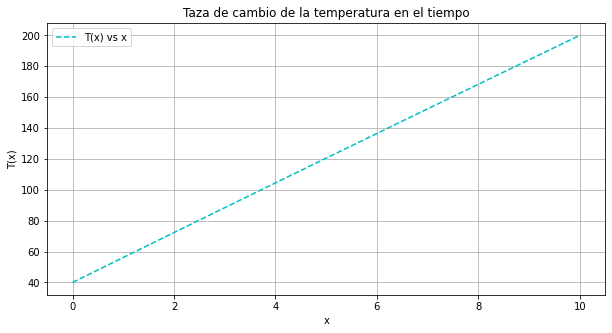

In [47]:
fig,ax=plt.subplots(1,1,figsize=(10,5))

ax.plot(x,T,'--c',label='T(x) vs x')
ax.set_xlabel('x')
ax.set_ylabel('T(x)')
ax.set_title('Taza de cambio de la temperatura en el tiempo')
ax.legend()
ax.grid()

## Ejercicio 2.  $\color{red}{\text{(4p)}}$ Ecuaciones diferenciales - problema de valor inicial (initial value problem).

La ley de Newton del enfriamiento tiene forma de ecuación diferencial

$$\frac{dy}{dt}=k(y-T_{amb}) $$


donde:
* y es la temperatura actual de un objeto
* t es tiempo
* k es un valor constante de enfriamiento
* $T_{amb}$ es la temperatura del ambiente

Digamos que una taza de café tiene una temperatura inicial de 90 centígrados y la temperatura ambiente es de 25 centígrados.

a) usando `scipy.integrate.solve_ivp` resolver ecuación diferencial:

* para el rango t: t=[0:60], [minutos] (use 100 puntos)
* asumir k=-0.06

b) Hace grafico de $y(t)$ vs $t$ (con leyenda)
* si le gusta tomar café cuando está a más de 70 grados, ¿cuál es el tiempo máximo que puede esperar antes de beber el café (puede obtener índices usando `np.argwhere` para obtener un rango de temperatura más preciso)

In [49]:
k = .06
T_amb=25.
def dydt(t,y): return k*(y - T_amb)

In [50]:
y0 = 90.0
t = np.linspace(0,60,100)
Y = odeint(dydt,y0,t)

In [51]:
sol = solve_ivp(dydt,[0,60],[90,])
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 38
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.1873426 ,  2.06076861, 18.62681167, 34.24575906,
       51.285661  , 60.        ])
 t_events: None
        y: array([[90.        , 89.27345489, 82.44001316, 46.28405153, 33.34438301,
        28.00610608, 26.7821102 ]])
 y_events: None

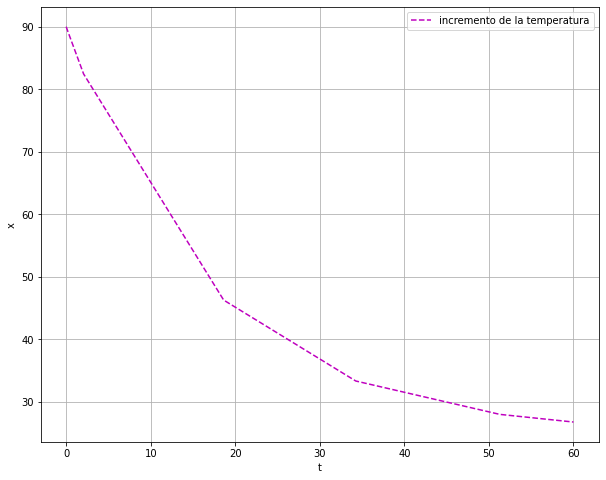

In [52]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.plot(sol.t,sol.y[0],'--m',label = 'incremento de la temperatura')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.legend()
ax.grid()

## Ejercicio 3.  $\color{red}{\text{(3p)}}$ Equaciones diferenciales - problema de valor de limite (boundary value problem).

Los organizadores de un espectáculo de fuegos artificiales quieren que los fuegos exploten a 40 metros sobre el suelo 5 segundos después del lanzamiento. Encuentra la velocidad inicial del cohete. 

a) usar ecuacion diferencial segunda orden:

$$\frac{d^2y}{dt^2}= −g $$

donde $y$ es altitud de cohete y,   

b) hacer plot $y(t)$ vs $t$


## Ejercicio 4 Ecuaciones diferenciales acopladas - problema de valor inicial `scipy.integrate.solve_ivp` $\color{red}{\text{(10p)}}$ o `otros metodos`  $\color{red}{\text{(7p)}}$

Las ecuaciones de Lotka-Volterra, también conocidas como ecuaciones depredador-presa, son un par de ecuaciones de primer orden, no lineales, ecuaciones diferenciales utilizadas con frecuencia para describir la dinámica de los sistemas biológicos en los que interactúan dos especies, uno como depredador y el otro como presa. Las poblaciones cambian a través del tiempo de acuerdo con el par de ecuaciones. 

$$\frac{dx}{dt}=x(\color{red}{\alpha}-\color{red}{\beta} y)$$
$$\frac{dy}{dt}=-y(\color{red}{\gamma}-\color{red}{\delta} x)$$

Esa ecuación describiría la evolución de la población de conejos y zorros (condiciones perfectas)

* x - numbero de conejos  
* y - numbero de zorros

* $\color{red}{\alpha, \beta, \gamma, \delta }$ son parámetros que describen la interacción de las dos especies

* $\frac{dx}{dt}, \frac{dy}{dt}$ representan las tasas de crecimiento de las dos poblaciones a lo largo del tiempo

* $t$ es tiempo

![](https://raw.githubusercontent.com/mhemmg/ComputationalNumericalMethods/master/extras/additional_materials/examen_parcial_IV/rabbits_foxes.png)

a) solucionar los ecuaciones diferenciales usando `scipy.integrate.solve_ivp` o `scipy.integrate.odeint`
asumir: 
* $\alpha, \beta, \gamma, \delta = 1$
* $x_{ini}=4$
* $y_{ini}=2$
* $t=0:30$ (unidades arbitrarias, asumir meses)

b) hacer plot $x$ vs. $t$ , $y$ vs. $t$   
c) hacer plot $x vs y$  
d) comentar sobre los dos plots  

In [13]:
alfa = 1; beta = 1; gamma = 1; deltha = 1

def func(t0, y0):

  func = np.zeros(2)
  func[0] = y0[0] * (alfa - beta*y0[1])
  func[1] = -y0[1] * (gamma - deltha * y0[0])
  return func

In [14]:

def rungeKutta4(tf, y0, func, h):
    t = np.arange(tf[0], tf[1] + h, h)
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    
    for i in range(0, len(t) - 1):
        
        k1 = func(t[i], y[i])
        k2 = func(t[i] + h * 0.5, y[i] + k1 * h * 0.5)
        k3 = func(t[i] + h * 0.5, y[i] + k2 * h * 0.5)
        k4 = func(t[i] + h, y[i] + k3 * h)
        
        y[i + 1] = y[i] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        
    return t, y

In [15]:
def Dty(yi, ti):  
    
    func = np.zeros(2)

    func[0] = yi[0] * (alfa - beta*yi[1])
    func[1] = -yi[1] * (gamma - deltha * yi[0])
    
    return func

In [16]:
from scipy import integrate

In [17]:
tf = [0., 30.] 
y0 = np.array([4.0,
               2.0])
h = 0.01 

t, y = rungeKutta4(tf, y0, func, h)

In [18]:
todeint = np.linspace(tf[0], tf[1], 2000)
yodeint = integrate.odeint(Dty, y0, t)

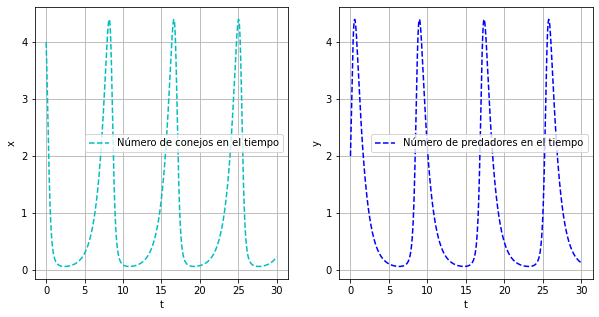

In [19]:
fig, axis = plt.subplots(1,2, figsize = (10,5))

axis[0].plot(t, y[:, 0], '--c', label='Número de conejos en el tiempo')
axis[0].set_xlabel('t', )
axis[0].set_ylabel('x')
axis[0].legend()
axis[0].grid()

axis[1].plot(t, y[:, 1], '--b', label='Número de predadores en el tiempo')
axis[1].set_xlabel('t')
axis[1].set_ylabel('y')
axis[1].legend()
axis[1].grid()

In [20]:
obj = integrate.solve_ivp(func, tf, y0, method = 'RK45', t_eval = todeint)
tsolve_ivp = obj.t
ysolve_ivp = obj.y

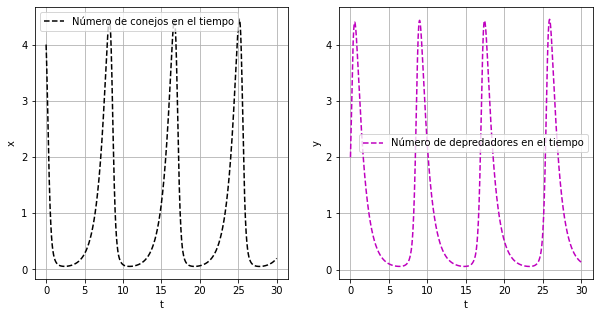

In [21]:
fig, axis = plt.subplots(1,2, figsize = (10,5))

axis[0].plot(tsolve_ivp, ysolve_ivp[ 0 , :], '--k', label='Número de conejos en el tiempo')
axis[0].set_xlabel('t')
axis[0].set_ylabel('x')
axis[0].legend()
axis[0].grid()

axis[1].plot(tsolve_ivp, ysolve_ivp[ 1 , :], '--m', label='Número de depredadores en el tiempo')
axis[1].set_xlabel('t')
axis[1].set_ylabel('y')
axis[1].legend()
axis[1].grid()

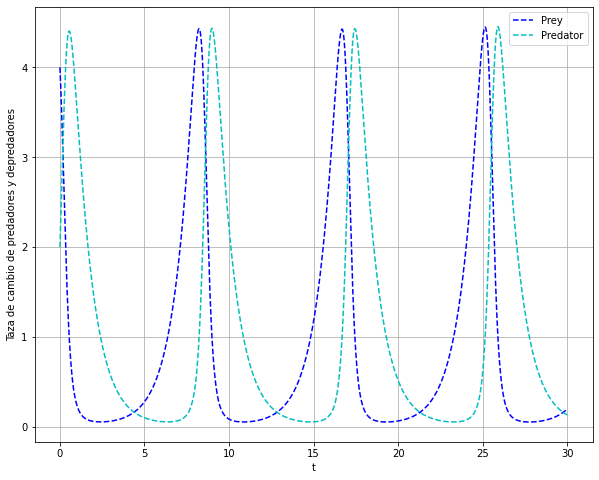

In [22]:
fig,ax=plt.subplots(1,1,figsize=(10,8))

ax.plot(tsolve_ivp, ysolve_ivp[ 0 , :],'--b',label='Prey')
ax.plot(tsolve_ivp, ysolve_ivp[ 1 , :],'--c',label='Predator')
ax.set_xlabel('t')
ax.set_ylabel('Taza de cambio de predadores y depredadores')
ax.legend()
ax.grid()

Se puede observar que cuando el pico de presas llega a su máximo, el de los depredadores lo hace tiempo después. Asimismo cuando disminuye la población de presas, los depredadores también disminuyen. Esto significa que la población crece directamente proporcional a los zorros y cuando estos se quedan sin presas, disminuye el pico de crecimiento.

# Feedback:

```
Exercise 1.
Solution + presentation of the results	            (max 3.0p):	0.0p

Exercise 2.
Solution + presentation of the results	            (max 4.0p):	3.0p
- k = .06 error (k=-0.06)

Exercise 3.
Solution + presentation of the results	            (max 3.0p):	0.0p

Exercise 4 ODEINT.
Solution + presentation of the results	            (max 7.0p):	7.0p

Exercise 4 IVP.
Solution + presentation of the results	            (max 10.0p):  10.0p


- Total:                                            (max 10.0p):   9.0p  (por lo menos un ejercicio parece copiado de otra persona)
```